In [1]:
from __future__ import division, print_function, absolute_import

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [11]:
key1='SLdF'
key2='UhTDAT'
key3='sz4VoXLDdx'
key = key1 + key2 + key3
quandl.ApiConfig.api_key = key
frequency='monthly'
start='2007-12-31'
end = '2017-05-31'
data = quandl.get(['WIKI/AAPL', 'WIKI/NDAQ'], collapse=frequency, trim_start=start, trim_end=end)
data.head()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
Date,,,,,,,,,,,,,,,,,,,,,
2007-12-31,199.50,200.50,197.75,198.08,19261900.0,0.0,1.0,25.638531,25.767044,25.413631,...,49.26,49.49,1449800.0,0.0,1.0,44.879825,45.206553,44.707384,44.916128,1449800.0
2008-01-31,129.45,136.65,129.40,135.36,48059800.0,0.0,1.0,16.636129,17.561430,16.629704,...,41.45,46.27,3525200.0,0.0,1.0,38.118355,42.202464,37.619186,41.993721,3525200.0
2008-02-29,129.75,130.21,124.80,125.02,44838600.0,0.0,1.0,16.674683,16.733800,16.038539,...,40.75,41.51,5633800.0,0.0,1.0,38.653827,39.025934,36.983880,37.673640,5633800.0
2008-03-31,143.27,145.71,142.52,143.50,27430900.0,0.0,1.0,18.412192,18.725766,18.315806,...,38.08,38.66,2127500.0,0.0,1.0,35.096114,35.713268,34.560641,35.087038,2127500.0
2008-04-30,176.26,180.00,172.92,173.95,40697300.0,0.0,1.0,22.651867,23.132509,22.222630,...,36.20,36.45,2941500.0,0.0,1.0,34.678627,34.678627,32.854391,33.081286,2941500.0


In [12]:
data.describe()

,WIKI/AAPL - Open,WIKI/AAPL - High,WIKI/AAPL - Low,WIKI/AAPL - Close,WIKI/AAPL - Volume,WIKI/AAPL - Ex-Dividend,WIKI/AAPL - Split Ratio,WIKI/AAPL - Adj. Open,WIKI/AAPL - Adj. High,WIKI/AAPL - Adj. Low,...,WIKI/NDAQ - Low,WIKI/NDAQ - Close,WIKI/NDAQ - Volume,WIKI/NDAQ - Ex-Dividend,WIKI/NDAQ - Split Ratio,WIKI/NDAQ - Adj. Open,WIKI/NDAQ - Adj. High,WIKI/NDAQ - Adj. Low,WIKI/NDAQ - Adj. Close,WIKI/NDAQ - Adj. Volume
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,...,114.000000,114.000000,1.140000e+02,114.0,114.0,114.000000,114.000000,114.000000,114.000000,1.140000e+02
mean,270.682761,273.196666,267.916329,270.178670,2.729450e+07,0.0,1.0,65.539889,66.048393,64.913010,...,36.114600,36.548947,1.951090e+06,0.0,1.0,34.403284,34.798806,34.007861,34.413595,1.951090e+06
std,178.558093,180.102301,176.910085,178.507795,1.687421e+07,0.0,0.0,37.432821,37.561552,37.134394,...,16.280077,16.415478,1.158745e+06,0.0,0.0,16.500981,16.601361,16.421684,16.556152,1.158745e+06
min,85.970000,87.740000,85.340000,85.350000,6.023900e+06,0.0,1.0,11.048343,11.275813,10.967379,...,17.770000,17.780000,2.358000e+05,0.0,1.0,16.336438,16.409044,16.127694,16.136770,2.358000e+05
25%,118.092500,119.402500,117.075000,117.445000,1.511132e+07,0.0,1.0,31.532260,31.860212,31.198686,...,23.110000,23.177500,1.123913e+06,0.0,1.0,21.366382,21.529992,21.046777,21.096667,1.123913e+06
50%,191.778000,193.170000,186.723350,188.625000,2.155055e+07,0.0,1.0,61.399595,61.845402,60.851646,...,30.915000,31.560000,1.659300e+06,0.0,1.0,28.750954,29.588110,28.420195,29.188881,1.659300e+06
75%,403.237500,408.567500,402.880000,404.945000,3.632489e+07,0.0,1.0,96.811955,97.012962,96.204859,...,48.332500,48.462500,2.532175e+06,0.0,1.0,46.082361,46.164043,45.375952,45.435271,2.532175e+06
max,678.750000,681.110000,666.750000,667.105000,8.374546e+07,0.0,1.0,153.347799,153.546991,151.764225,...,71.050000,71.210000,7.057200e+06,0.0,1.0,70.126121,70.278826,69.643376,70.057157,7.057200e+06


In [13]:
data = data[['WIKI/AAPL - Adj. Close', 'WIKI/NDAQ - Adj. Close']]
data.head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,25.456041,44.916128
2008-01-31,17.395647,41.993721
2008-02-29,16.066812,37.673640
2008-03-31,18.441750,35.087038
2008-04-30,22.354999,33.081286


In [14]:
np.log(data/data.shift(1)).head()

,WIKI/AAPL - Adj. Close,WIKI/NDAQ - Adj. Close
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [15]:
data.rename(columns={'WIKI/AAPL - Adj. Close': 'Apple', 'WIKI/NDAQ - Adj. Close': 'Nasdaq'}, inplace=True)

In [17]:
data_log = np.log(data/data.shift(1))
data_log.head()

,Apple,Nasdaq
Date,,
2007-12-31,NaN,NaN
2008-01-31,-0.380733,-0.067277
2008-02-29,-0.079464,-0.108559
2008-03-31,0.137861,-0.071129
2008-04-30,0.192433,-0.058864


In [19]:
data_df = sm.add_constant(data_log)
data_df.head()

,const,Apple,Nasdaq
Date,,,
2007-12-31,1.0,NaN,NaN
2008-01-31,1.0,-0.380733,-0.067277
2008-02-29,1.0,-0.079464,-0.108559
2008-03-31,1.0,0.137861,-0.071129
2008-04-30,1.0,0.192433,-0.058864


In [21]:
model = sm.OLS(data_df['Apple'], data_df['Nasdaq'], missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     7.302
Date:                Mon, 15 Apr 2019   Prob (F-statistic):            0.00796
Time:                        21:55:47   Log-Likelihood:                 109.91
No. Observations:                 113   AIC:                            -217.8
Df Residuals:                     112   BIC:                            -215.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Nasdaq         0.2923      0.108      2.702      0.0

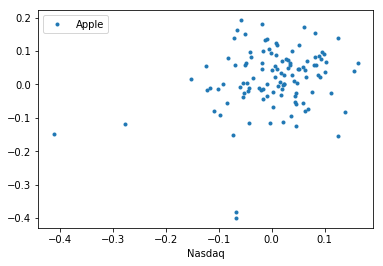

In [26]:
data_df.plot(y='Apple', x='Nasdaq', style='.')

In [16]:
mean = 1
obs=np.array([3, -3, 0, 2, 1, 3])

In [13]:
import numpy as np

In [20]:
np.min(obs, 0)

-3

In [ ]:
np.